In [1]:
#!git clone https://github.com/NSCC-COGS/GDAA2030.git

Cloning into 'GDAA2030'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 431 (delta 22), reused 7 (delta 1), pack-reused 370
Receiving objects: 100% (431/431), 32.56 MiB | 32.62 MiB/s, done.
Resolving deltas: 100% (180/180), done.


In [2]:
%cd /content/GDAA2030/tutorial2/thorneman/

/content/GDAA2030/tutorial2/thorneman


In [0]:
%%capture 
run GDAA2030_T2_benmanthorne_getLandsat.ipynb

In [5]:
print(selectedScene)

productId                   LC08_L1GT_008028_20200423_20200423_01_RT
entityId                                       LC80080282020114LGN00
acquisitionDate                           2020-04-23 15:00:43.951389
cloudCover                                                     93.66
processingLevel                                                 L1GT
path                                                               8
row                                                               28
min_lat                                                      44.9312
min_lon                                                     -65.2554
max_lat                                                      47.0816
max_lon                                                     -62.1849
download_url       https://s3-us-west-2.amazonaws.com/landsat-pds...
lat                                                          46.0064
lon                                                         -63.7201
dist                              

In [0]:
from matplotlib import pyplot as plt 
import tifffile
import numpy as np

In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
def ourPlot(a, interpolation = 'bilinear', histogram=True):
  stats = {
      'max' : np.nanmax(a),
      'min' : np.nanmin(a),
      'mean' : np.nanmean(a),
      'std' : np.nanstd(a),
      'bitDepth' : a.dtype,
      'dimensions' : a.shape,
      'top_left_value' : a[0,0]
  }
  for item in stats:
    print('%s: %s'%(item, stats[item]))
  
  plt.cla()
  plt.subplot(121)
  plt.imshow(a, interpolation = interpolation)
  if histogram:
    plt.subplot(122)
    plt.hist(a.flatten(), bins=100)
    s0 = stats['mean'] - stats['std']
    s1 = stats['mean'] + stats['std']
    plt.axvline(s0, c='red')
    plt.axvline(s1, c='red')

max: 48157
min: 0
mean: 17795.96163237961
std: 14076.740388852393
bitDepth: uint16
dimensions: (7971, 7851)
top_left_value: 0


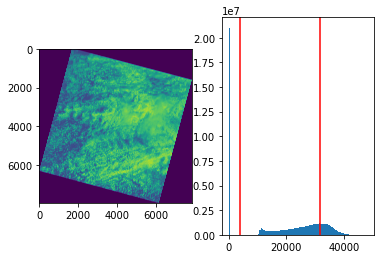

In [10]:
imageFullSize = tifffile.imread(imagePath)
ourPlot(imageFullSize)

max: 48157
min: 0
mean: 17756.230472810526
std: 14086.33176919777
bitDepth: uint16
dimensions: (798, 786)
top_left_value: 0


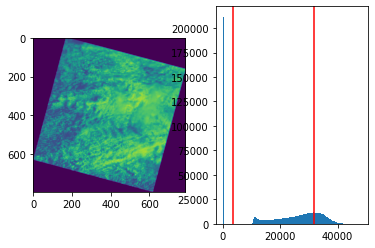

In [11]:
image = imageFullSize[::10,::10]
ourPlot(image)

max: True
min: False
mean: 0.33734463384925417
std: 0.47280358698128216
bitDepth: bool
dimensions: (798, 786)
top_left_value: True


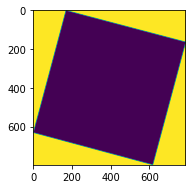

In [12]:
mask = image == 0
ourPlot(mask, histogram=False)

max: 1
min: 0
mean: 0.33734463384925417
std: 0.47280358698128216
bitDepth: int32
dimensions: (798, 786)
top_left_value: 1


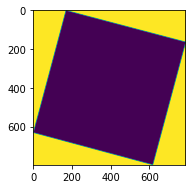

In [13]:
from scipy.ndimage import label
labelMask,unused = label(mask)
ourPlot(labelMask, histogram=False)

In [14]:
print(image.mean())
print(image[~mask].mean())

17756.230472810526
26795.573355051056


max: True
min: False
mean: 0.3720481228516584
std: 0.48335113233985066
bitDepth: bool
dimensions: (798, 786)
top_left_value: False


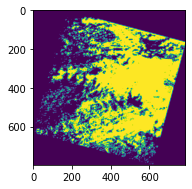

In [15]:
thresholdImage = image > image[~mask].mean()
ourPlot(thresholdImage, histogram=False)

max: True
min: False
mean: 0.3720481228516584
std: 0.48335113233985066
bitDepth: bool
dimensions: (798, 786)
top_left_value: False


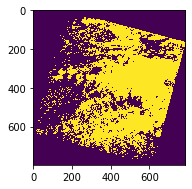

In [16]:
ourPlot(thresholdImage, interpolation = 'nearest', histogram=False)

max: 2657
min: 0
mean: 58.27368357279968
std: 299.58222073115905
bitDepth: int32
dimensions: (798, 786)
top_left_value: 0


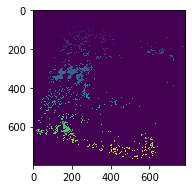

In [17]:
labelThreshold,unused = label(thresholdImage)
ourPlot(labelThreshold, interpolation = 'nearest', histogram=False)

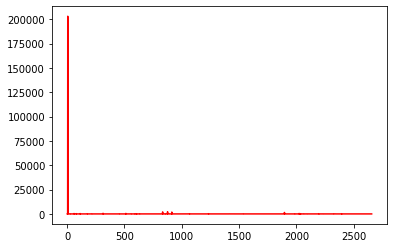

In [18]:
labels, pixelCount = np.unique(labelThreshold[labelThreshold!=0], return_counts=True)
plt.plot(labels, pixelCount, c='red')

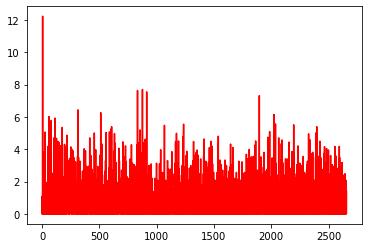

In [19]:
plt.plot(labels, np.log(pixelCount), c='red')

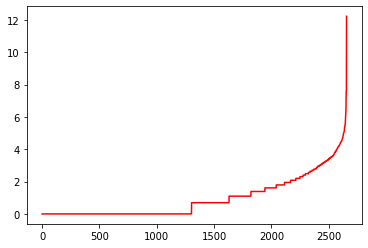

In [20]:
pixelCountorted = np.sort(pixelCount)
plt.plot(np.log(pixelCountorted), c='red')

Label; 5
max: True
min: False
mean: 0.32378975428392864
std: 0.4679208793211537
bitDepth: bool
dimensions: (798, 786)
top_left_value: False


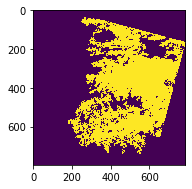

In [21]:
sorter = np.argsort(pixelCount)
largestLabel = labels[sorter][-1]
print('Label;',largestLabel)

largestArea = (labelThreshold == largestLabel)
ourPlot((largestArea), interpolation='nearest', histogram=False)

Label: 876
max: True
min: False
mean: 0.0034963362604985746
std: 0.05902636608543752
bitDepth: bool
dimensions: (798, 786)
top_left_value: False


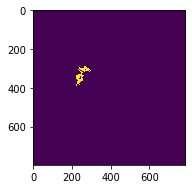

In [23]:
secondLargestLabel = labels[sorter][-2]
print('Label:', secondLargestLabel)
secondLargestArea = (labelThreshold == secondLargestLabel)
ourPlot((secondLargestArea), interpolation='nearest', histogram=False)

max: True
min: False
mean: 0.0011542852041044086
std: 0.03395515910391227
bitDepth: bool
dimensions: (798, 786)
top_left_value: False


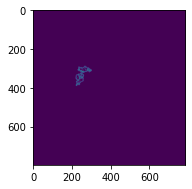

In [24]:
from skimage.morphology import dilation
secondLargestPerm = ~secondLargestArea & dilation(secondLargestArea)
ourPlot(secondLargestPerm, interpolation='bilinear', histogram=False)

max: 48157.0
min: 10045.0
mean: 26795.574
std: 7564.684
bitDepth: float32
dimensions: (798, 786)
top_left_value: nan


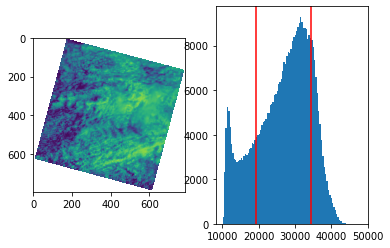

In [25]:
image32 = image.astype(np.float32)
image32[mask] = np.nan
ourPlot(image32)

max: 48157.0
min: 26796.0
mean: 32800.082
std: 3298.3713
bitDepth: float32
dimensions: (798, 786)
top_left_value: nan


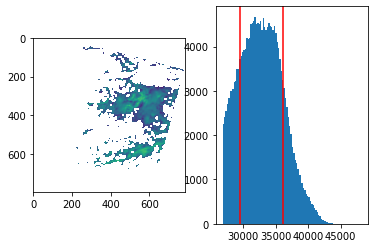

In [26]:
image32LargestArea = image32.copy()
image32LargestArea[~largestArea] = np.nan
ourPlot(image32LargestArea)

In [0]:
def stdScale(a, n=1, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  s0 = np.nanmean(b) - np.nanstd(b)/n
  s1 = np.nanmean(b) + np.nanstd(b)/n
  print('Scale from %f to %f' %(s0,s1))
  b[b<s0] = s1
  b[b>s1] = s1
  return b

Scale from 19230.890137 to 34360.258301
max: 34360.258
min: 19231.0
mean: 30172.137
std: 4558.4043
bitDepth: float32
dimensions: (798, 786)
top_left_value: nan


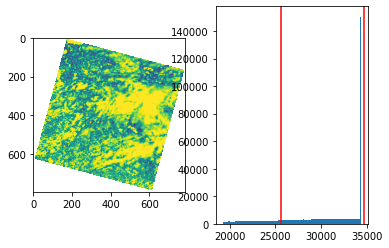

In [29]:
image32_scaled = stdScale(image32)
ourPlot(image32_scaled)

Scale from 29501.710693 to 36098.453369
max: 36098.453
min: 29502.0
mean: 33953.02
std: 2167.2683
bitDepth: float32
dimensions: (798, 786)
top_left_value: nan


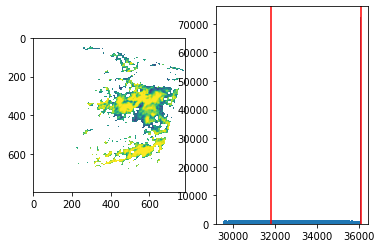

In [30]:
image32LargestArea_scaled = stdScale(image32LargestArea)
ourPlot(image32LargestArea_scaled)

In [0]:
def convert32(a, maskVal=0, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  mask = b == maskVal
  b = b.astype(np.float32)
  b[mask] = np.nan
  return b

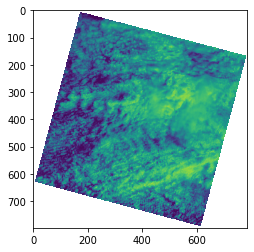

In [32]:
from skimage.feature import peak_local_max
localMaxPts = peak_local_max(image32, min_distance=20)
plt.imshow(image32)
plt.scatter(localMaxPts[:,1], localMaxPts[:,0], c='red')

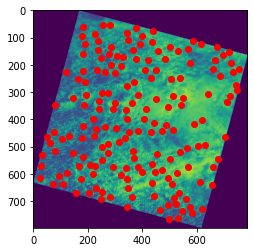

In [33]:
localMaxPts = peak_local_max(image,min_distance=20)
plt.imshow(image)
plt.scatter(localMaxPts[:,1], localMaxPts[:,0], c='red')

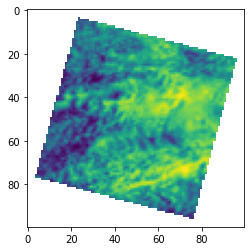

In [34]:
import skimage
image32resamp = skimage.transform.resize(image32, output_shape = [100,100])
plt.imshow(image32resamp)

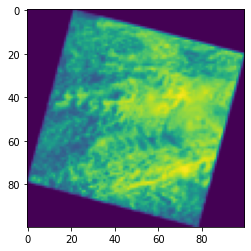

In [35]:
imageResamp = skimage.transform.resize(image, output_shape =[100,100])
plt.imshow(imageResamp)

In [0]:
def normalize(a, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()

  if b.dtype != np.float32:
    b = b.astype(np.float32)
  
  b -= np.nanmin(b)
  b /= np.nanmax(b)

  return b

max: 1.0
min: 0.0
mean: 0.7231775
std: 0.30129728
bitDepth: float32
dimensions: (798, 786)
top_left_value: nan


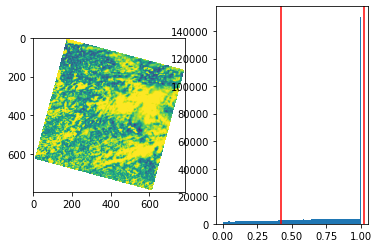

In [37]:
image32_scaled_norm = normalize(image32_scaled)
ourPlot(image32_scaled_norm)

In [0]:
def scale8bit(a, return_mask=True, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  
  if return_mask:
    mask = ~np.isnan(b)
  b *= 255
  b = b.astype(np.uint8)

  if return_mask:
    mask = mask.astype(np.uint8)
    mask *= 255

    return b,mask
  
  else:
    return b

max: 255
min: 0
mean: 121.98627452856059
std: 107.25489142332708
bitDepth: uint8
dimensions: (798, 786)
top_left_value: 0


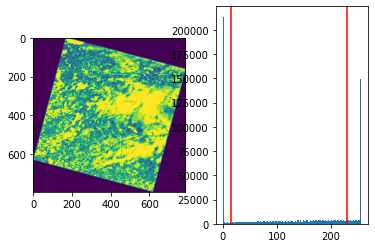

In [39]:
image8bit,mask8bit = scale8bit(image32_scaled_norm)
ourPlot(image8bit)

max: 255
min: 0
mean: 168.9771183684402
std: 120.56491468022693
bitDepth: uint8
dimensions: (798, 786)
top_left_value: 0


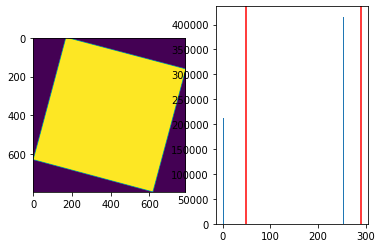

In [40]:
ourPlot(mask8bit)

In [0]:
def makeComposite(bands=[4,3,2]):
  images = []
  for band in bands:
    imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)
    glf.downloadImage(imageUrl, imagePath)
    im = tifffile.imread(imagePath)[::10,::10]
    images.append(im)

  return np.dstack(images)

https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/008/028/LC08_L1GT_008028_20200423_20200423_01_RT/LC08_L1GT_008028_20200423_20200423_01_RT_B4.TIF
.\images/LC08_L1GT_008028_20200423_20200423_01_RT_B4.TIF
downloading... https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/008/028/LC08_L1GT_008028_20200423_20200423_01_RT/LC08_L1GT_008028_20200423_20200423_01_RT_B4.TIF
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/008/028/LC08_L1GT_008028_20200423_20200423_01_RT/LC08_L1GT_008028_20200423_20200423_01_RT_B3.TIF
.\images/LC08_L1GT_008028_20200423_20200423_01_RT_B3.TIF
downloading... https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/008/028/LC08_L1GT_008028_20200423_20200423_01_RT/LC08_L1GT_008028_20200423_20200423_01_RT_B3.TIF
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/008/028/LC08_L1GT_008028_20200423_20200423_01_RT/LC08_L1GT_008028_20200423_20200423_01_RT_B2.TIF
.\images/LC08_L1GT_008028_20200423_20200423_01_RT_B2.TIF
downloading... https://s3-us-west-2.amazonaws.com

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


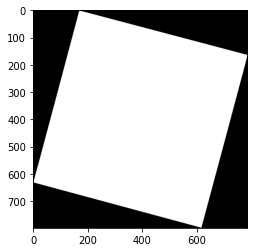

In [42]:
compositeImage = makeComposite([4,3,2])
plt.imshow(compositeImage)

In [0]:
def makeCompositeRGBA(bands=[4,3,2]):
  images=[]
  for band in bands:
    imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)
    glf.downloadImage(imageUrl,imagePath)
    im = tifffile.imread(imagePath)[::10,::10]
    im = convert32(im, inplace=True)
    im = stdScale(im, n=.5, inplace=True) 
    im = normalize(im, inplace=True)
    im,mask = scale8bit(im, return_mask=True, inplace=True)
    images.append(im)
  images.append(mask)

  return np.dstack(images)

https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/008/028/LC08_L1GT_008028_20200423_20200423_01_RT/LC08_L1GT_008028_20200423_20200423_01_RT_B4.TIF
.\images/LC08_L1GT_008028_20200423_20200423_01_RT_B4.TIF
.\images/LC08_L1GT_008028_20200423_20200423_01_RT_B4.TIF already found
Scale from 8857.007812 to 42101.714844
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/008/028/LC08_L1GT_008028_20200423_20200423_01_RT/LC08_L1GT_008028_20200423_20200423_01_RT_B3.TIF
.\images/LC08_L1GT_008028_20200423_20200423_01_RT_B3.TIF
.\images/LC08_L1GT_008028_20200423_20200423_01_RT_B3.TIF already found
Scale from 9274.943359 to 39671.177734
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/008/028/LC08_L1GT_008028_20200423_20200423_01_RT/LC08_L1GT_008028_20200423_20200423_01_RT_B2.TIF
.\images/LC08_L1GT_008028_20200423_20200423_01_RT_B2.TIF
.\images/LC08_L1GT_008028_20200423_20200423_01_RT_B2.TIF already found
Scale from 10636.145508 to 42005.752930
max: 255
min: 0
mean: 110.05790916540715
std: 99

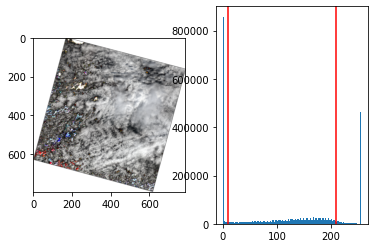

In [44]:
imageRGBA = makeCompositeRGBA([4,3,2])
ourPlot(imageRGBA)

max: 255
min: 0
mean: 168.9779314698961
std: 120.56463495145915
bitDepth: uint8
dimensions: (798, 786)
top_left_value: 0


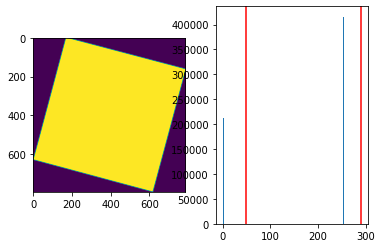

In [45]:
ourPlot(imageRGBA[:,:,3])

In [46]:
import folium
m = folium.Map([selectedScene.lat, selectedScene.lon], zoom_start=8)
folium.raster_layers.ImageOverlay(
  image=imageRGBA,
  bounds=[[selectedScene.min_lat, selectedScene.min_lon], [selectedScene.max_lat, selectedScene.max_lon]],).add_to(m)

m